## Steps to keep in mind when comparing basic models:
### 1. plot the time series
### 2. make forecasts using basic methods (naive, average, drift) and plot them on the same graph; how do these forecasts differ on the graph? which one seems the best?
### 3. split the data set to training (80%) and test (20%)
### 4. apply again the basic forecasting methods on the training set; plot them and see the differences in the methods
### 5. test accuracy of the forecasts, compared to the accuracy measures on the test data set, and see which method had the lowest error rates on RMSE, MAE, MASE and MAPE; choose that one
### 6. test residuals for the choosen method; we want:
#### - zero mean
#### - constant variance
#### - absence of autocorrelation (a must)
#### - normal distribution (see on histogram and test with Shapiro-Wilk test)
### 7. if results of testing residuals are not good, perform a transformation (e.g. log)
### 8. repeat 1-7 and compare results

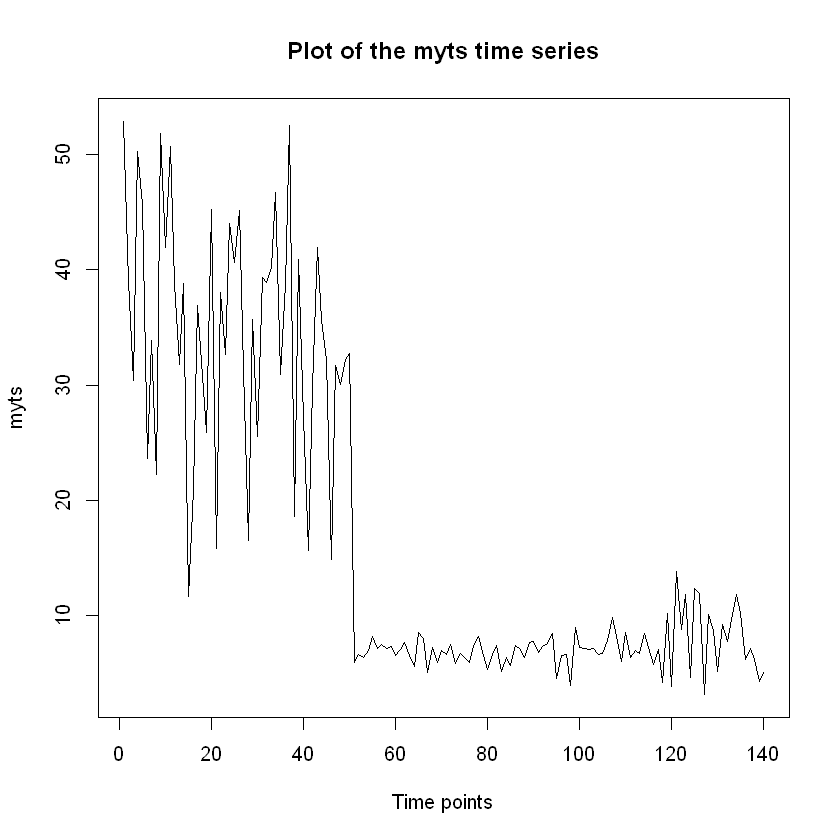

In [111]:
set.seed(54)
myts <- ts(c(rnorm(50, 34, 10), 
             rnorm(67, 7, 1), 
             runif(23, 3, 14)))
plot(myts, main = 'Plot of the myts time series', xlab = 'Time points')

#### From the graph it is obvious that this data has no constant mean and no constant variance. We see three distinct areas among the time points distribution of the myts.

In [112]:
length(myts)

[1] 140

In [113]:
# three basic forecast models with 10 steps into the future - naive, average and drift method
library(forecast)
naivem <- naive(myts, h=10) # naive method
meanm <- meanf(myts, h=10) # average method
driftm <- rwf(myts, h=10, drift = T) # drift method

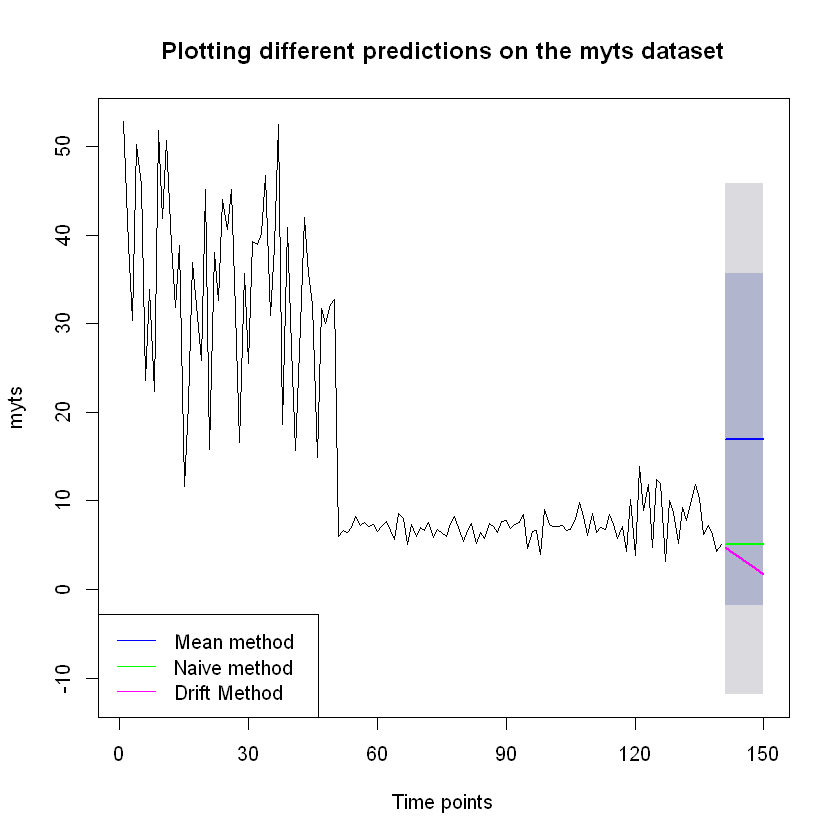

In [114]:
plot(meanm, main = 'Plotting different predictions on the myts dataset', xlab = 'Time points', ylab = 'myts', xaxt='n')
axis(side = 1, at = seq(0, 150, 30))
lines(naivem$mean, col='green', lwd = 2)
lines(driftm$mean, col=22, lwd = 2)
legend("bottomleft", lty=1, col=c(4,'green',22), legend=c("Mean method","Naive method","Drift Method"))

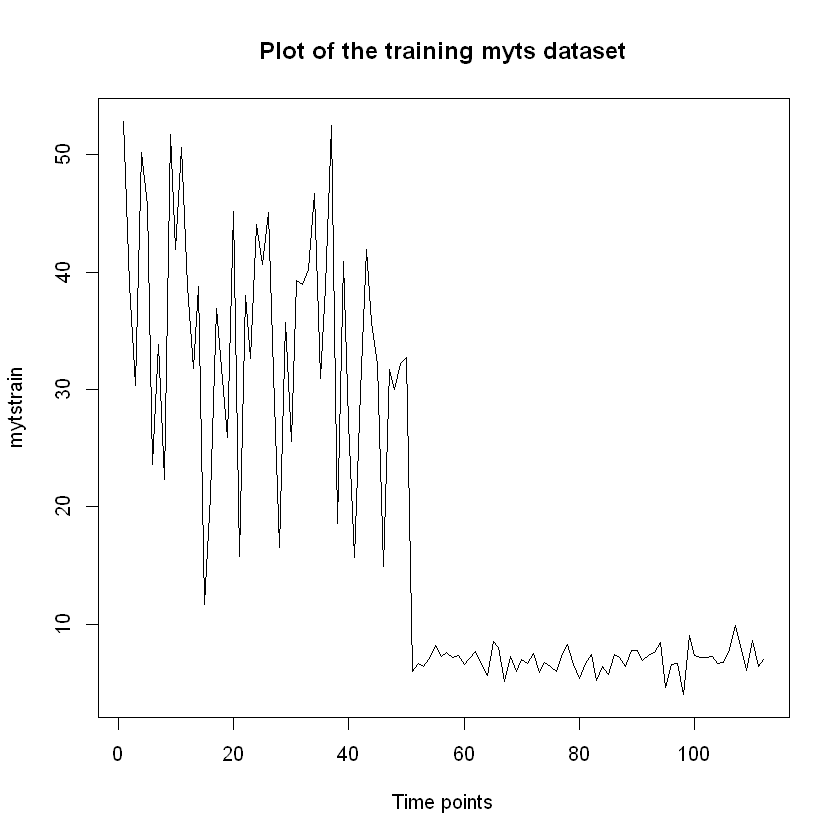

In [115]:
# making the training data set of first 112 observation (of total 140) - 80%, as often recommended
mytstrain <- window(myts, start = 1, end = 112)
plot(mytstrain, main = 'Plot of the training myts dataset', xlab = 'Time points')

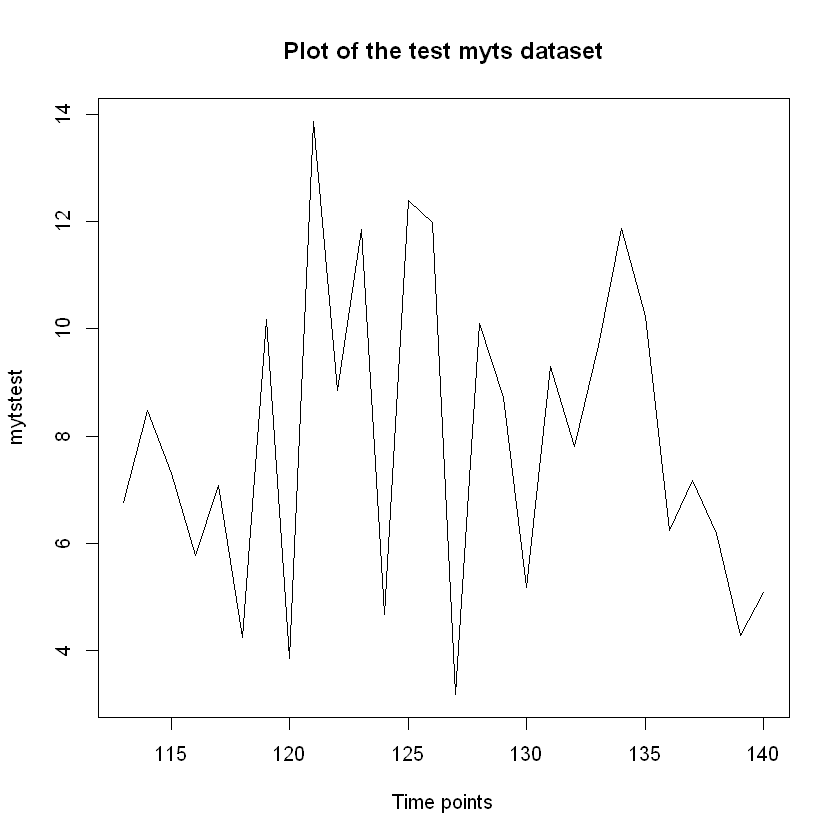

In [116]:
# making the test data set of the last 28 observations
mytstest <- window(myts, start = 113)
plot(mytstest, main = 'Plot of the test myts dataset', xlab = 'Time points')

In [117]:
# forecasting 28 years on the training dataset with the three basic methods
naivemtrain <- naive(mytstrain, h = 28) # naive method
meanmtrain <- meanf(mytstrain, h = 28) # average method
driftmtrain <- rwf(mytstrain, h = 28, drift = T) # drift method

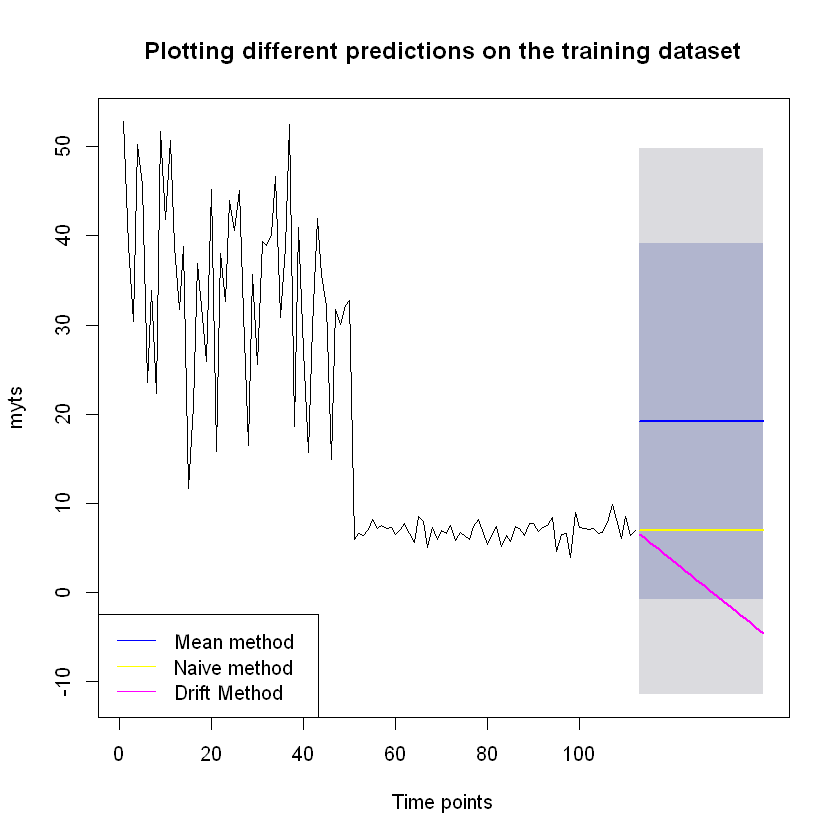

In [118]:
plot(meanmtrain, main = 'Plotting different predictions on the training dataset', xlab = 'Time points', ylab = 'myts', xaxt='n')
axis(side = 1, at = seq(0, 112, 20))
lines(naivemtrain$mean, col='yellow', lwd = 2)
lines(driftmtrain$mean, col=22, lwd = 2)
legend("bottomleft", lty=1, col=c(4,'yellow',22), legend=c("Mean method","Naive method","Drift Method"))

In [119]:
# accuracy of the naive method compared to the test dataset
accuracy(naivemtrain, mytstest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.4131666,10.024449,6.249032,-11.909758,33.36297,1.0000000,-0.4901263,NA
Test set,0.9663084,3.022963,2.482045,-1.869095,33.51426,0.3971888,-0.1703445,0.6497522


In [120]:
# accuracy of the average method compared to the test dataset
accuracy(meanmtrain, mytstest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-6.408719e-16,15.31467,13.94736,-84.86989,120.4406,2.231924,0.7632991,NA
Test set,-1.125187e+01,11.61073,11.25187,-180.27778,180.2778,1.800578,-0.1703445,2.002248


In [121]:
# accuracy of the drift method compared to the test dataset
accuracy(driftmtrain, mytstest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,4.321957e-16,10.015931,6.265918,-7.901602,33.29565,1.002702,-0.4901263,NA
Test set,6.957224e+00,8.172915,6.974530,86.321252,86.72796,1.116098,0.4327471,1.62159


#### We can see from the accuracy tests that the accuracy measures RMSE, MAE, MAPE and MASE were the lowest for the naive method, only somewhat higher for the drift method, and importantly higher for the average method. Naive method, due to the lowest error rates, therefore, seems to be the best for this dataset.
#### We are going to test the residuals for naive method.

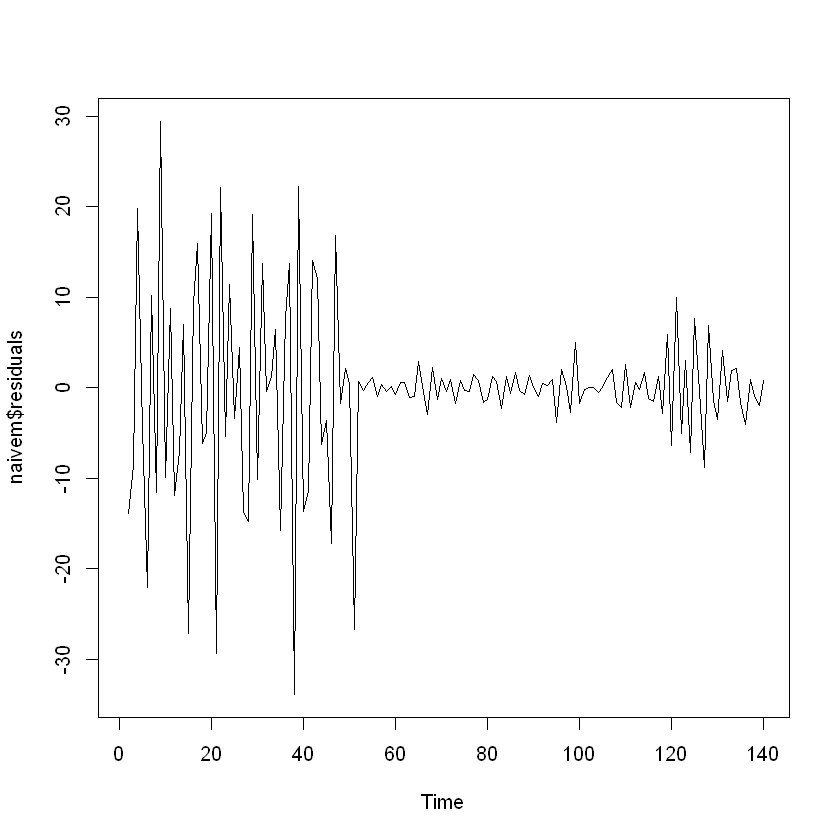

In [122]:
# plotting the residuals for naive method
# we see from the plot the absence of homoscedasticity - large variation of the variance of residuals
plot(naivem$residuals)

In [123]:
# residuals for the naive method > result depends on the last value observed
# mean not very close to 0
naivwithoutNA <- naivem$residuals[2:140]
mean(naivwithoutNA)
var(naivwithoutNA)

[1] -0.3435748

[1] 84.53723

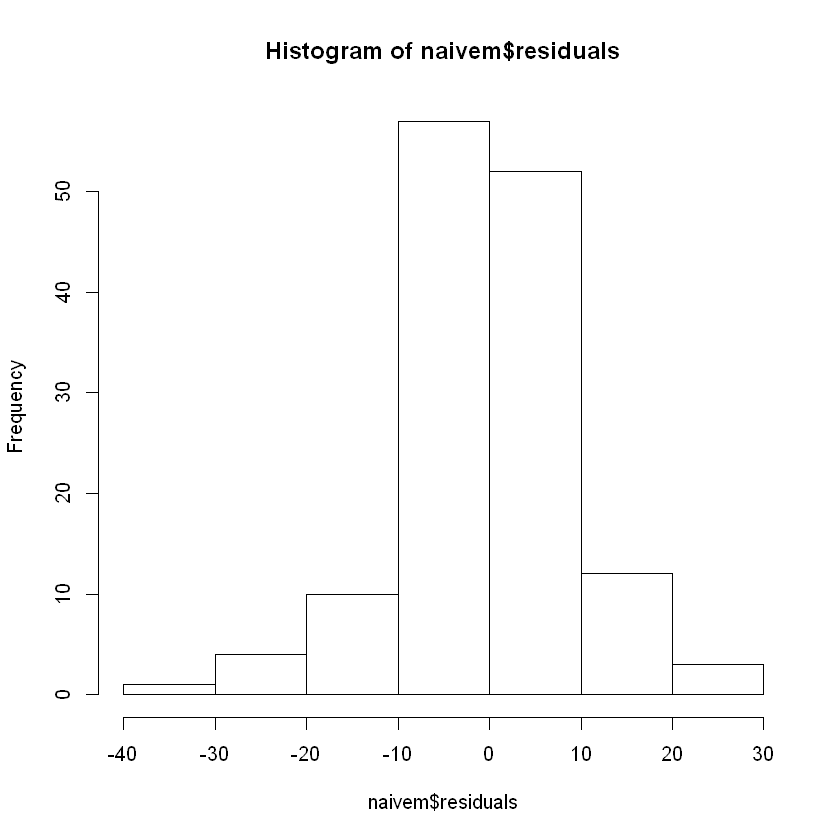

In [124]:
# histogram of residuals for the naive method - we want normal distribution, but we got non-equal tails and too much weight on the central area
hist(naivem$residuals)

In [125]:
# testing normality of residuals with the Shapiro-Wilk test
# p < .05 => we reject the normality hypothesis
shapiro.test(naivem$residuals)


	Shapiro-Wilk normality test

data:  naivem$residuals
W = 0.89587, p-value = 2.061e-08


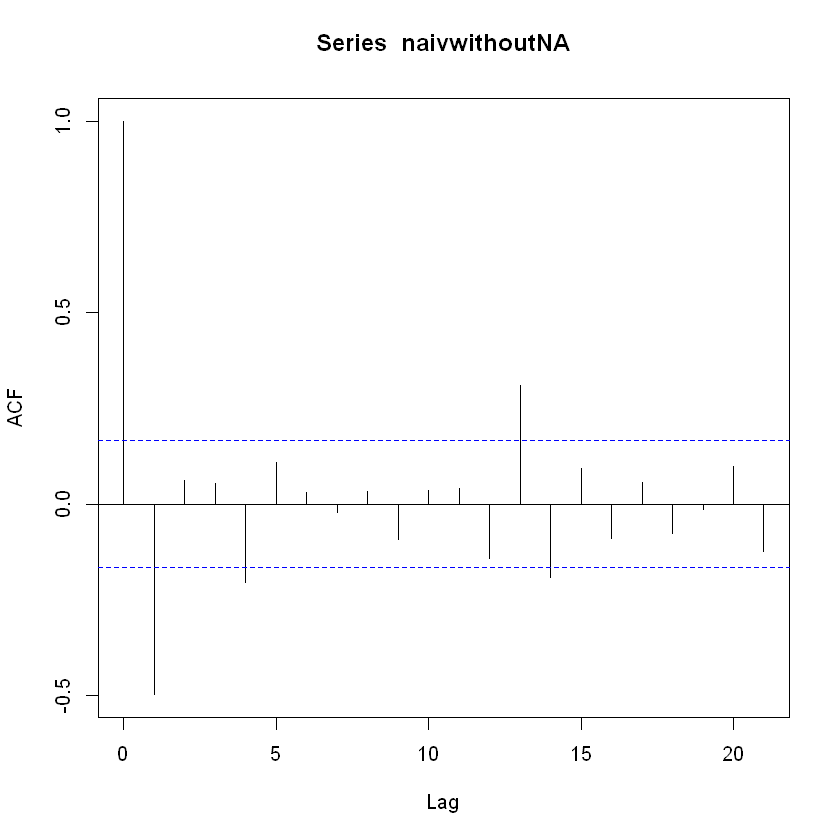

In [126]:
# autocorrelation - we want absence of correlation, and we got four significant ones
acf(naivwithoutNA)

## This data requires transformation. We will try the logaritmic one for this shape of data, and see how the results change.

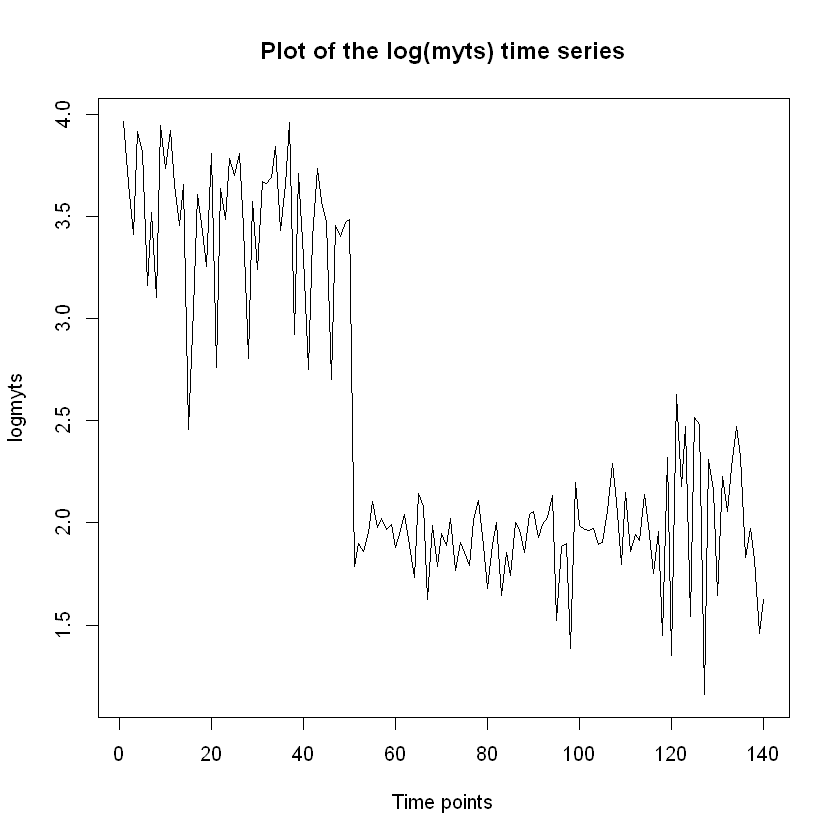

In [127]:
logmyts <- log(myts)
plot(logmyts, main = 'Plot of the log(myts) time series', xlab = 'Time points')
# we got much smaller differences in variance along the time points

In [128]:
# three basic forecast models with 10 steps into the future - naive, average and drift method
naivemlog <- naive(logmyts, h=10) # naive method
meanmlog <- meanf(logmyts, h=10) # average method
driftmlog <- rwf(logmyts, h=10, drift = T) # drift method

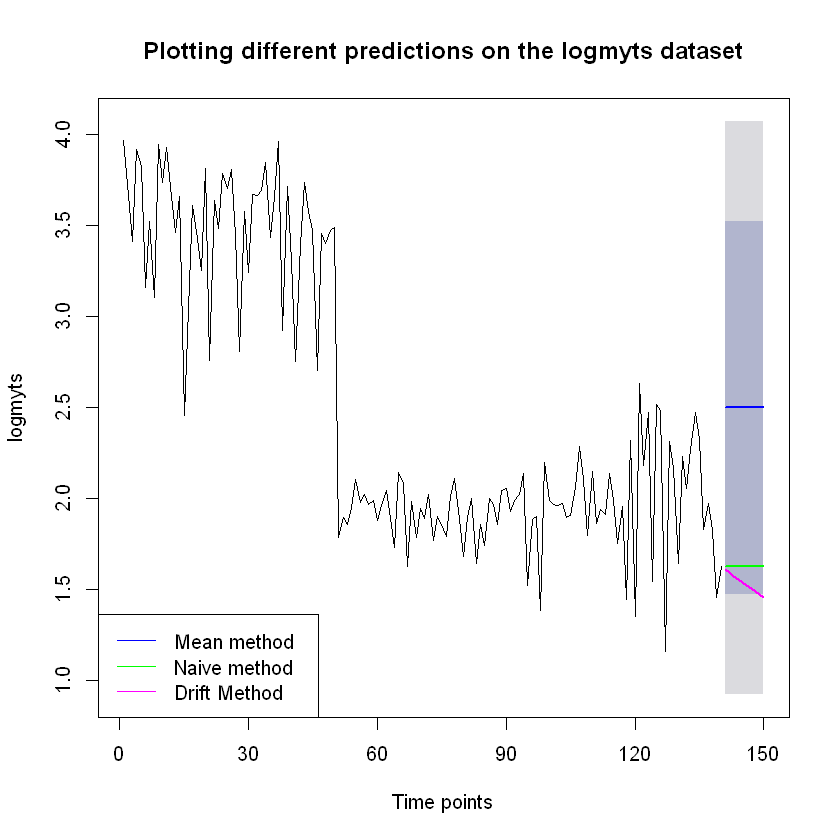

In [129]:
plot(meanmlog, main = 'Plotting different predictions on the logmyts dataset', xlab = 'Time points', ylab = 'logmyts', xaxt='n')
axis(side = 1, at = seq(0, 150, 30))
lines(naivemlog$mean, col='green', lwd = 2)
lines(driftmlog$mean, col=22, lwd = 2)
legend("bottomleft", lty=1, col=c(4,'green',22), legend=c("Mean method","Naive method","Drift Method"))

In [130]:
mytslog_train <- window(logmyts, start = 1, end = 112)
mytslog_test <- window(logmyts, start = 113)

In [131]:
# forecasting 28 years on the training dataset with the three basic methods
naivemlog_train <- naive(mytslog_train, h = 28) # naive method
meanmlog_train <- meanf(mytslog_train, h = 28) # average method
driftmlog_train <- rwf(mytslog_train, h = 28, drift = T) # drift method

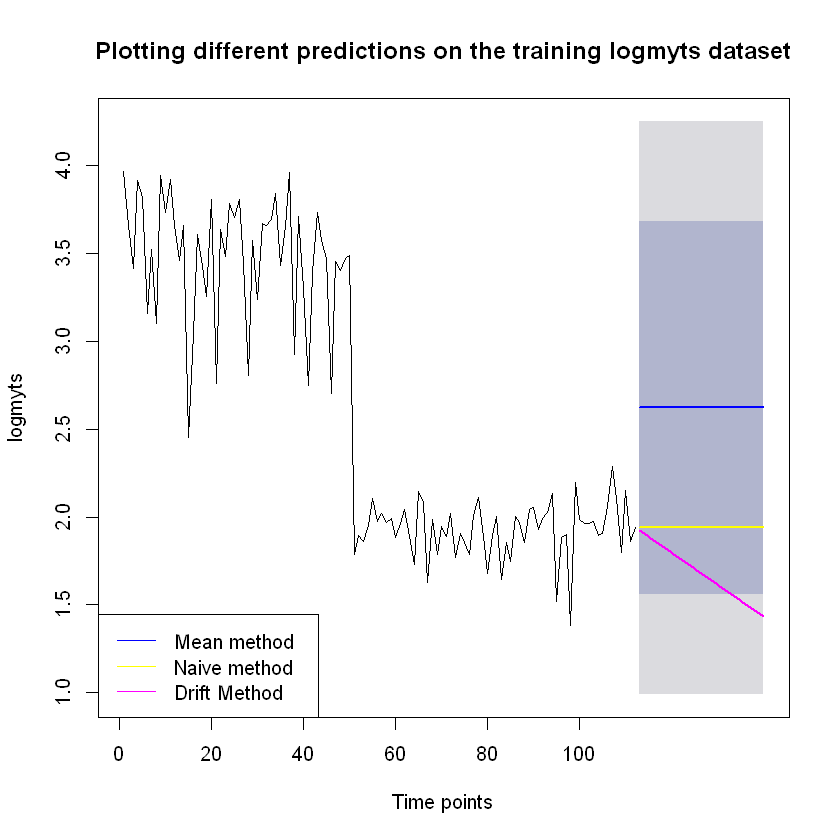

In [132]:
plot(meanmlog_train, main = 'Plotting different predictions on the training logmyts dataset', xlab = 'Time points', ylab = 'logmyts', xaxt='n')
axis(side = 1, at = seq(0, 112, 20))
lines(naivemlog_train$mean, col='yellow', lwd = 2)
lines(driftmlog_train$mean, col=22, lwd = 2)
legend("bottomleft", lty=1, col=c(4,'yellow',22), legend=c("Mean method","Naive method","Drift Method"))

In [133]:
# accuracy of the naive method compared to the test dataset
accuracy(naivemlog_train, mytslog_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.01824047,0.4071185,0.2873421,-1.870232,11.33626,1.000000,-0.4450652,NA
Test set,0.05893104,0.3914276,0.3316489,-1.328849,17.76316,1.154196,-0.2306541,0.577168


In [134]:
# accuracy of the average method compared to the test dataset
accuracy(meanmlog_train, mytslog_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.846038e-16,0.8163346,0.7714004,-9.839234,31.23484,2.684607,0.8615304,NA
Test set,-6.198835e-01,0.7307518,0.6204553,-36.737960,36.75971,2.159291,-0.2306541,0.9716032


In [135]:
# accuracy of the drift method compared to the test dataset
accuracy(driftmlog_train, mytslog_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-7.995930e-18,0.4067096,0.2876207,-1.103181,11.31901,1.000970,-0.4450652,NA
Test set,3.234179e-01,0.5206086,0.4411263,12.524858,21.27240,1.535196,-0.1049056,0.7824451


#### The accuracy measures RMSE, MAE, MAPE and MASE were the lowest for the naive method.
#### We are going to test the residuals for naive method.

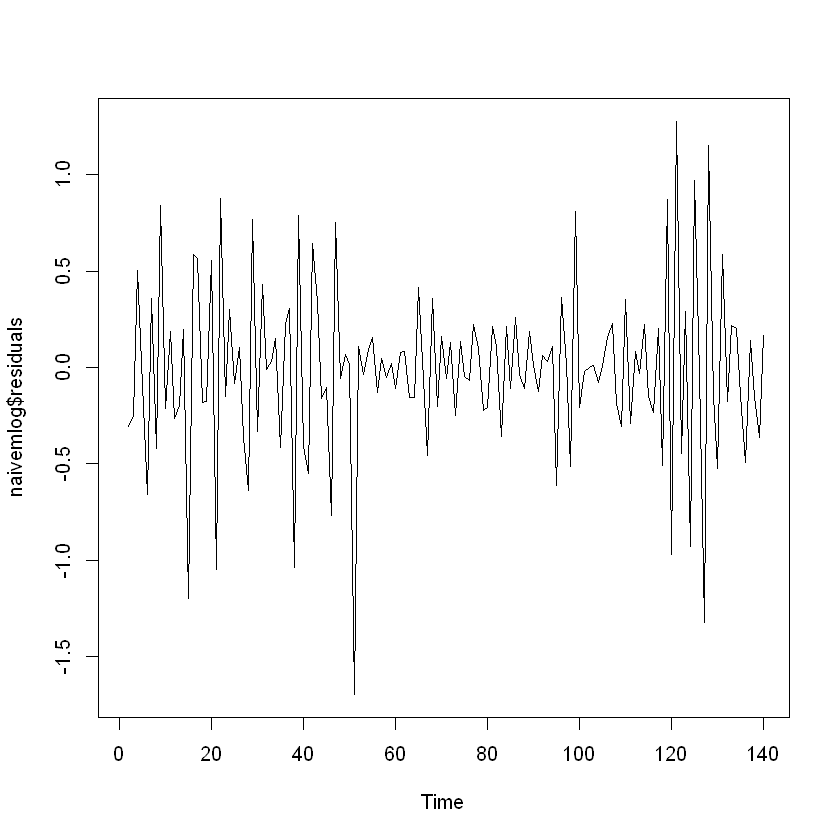

In [136]:
# plotting the residuals for naive method
# much better homoscedasticity than before log transformation
plot(naivemlog$residuals)

In [137]:
# residuals for the naive method > result depends on the last value observed
# mean not very close to 0, and variance far from 1
mean(naivemlog$residuals[2:140]) # mean rather close to 0
var(naivemlog$residuals[2:140])

[1] -0.01684688

[1] 0.2067372

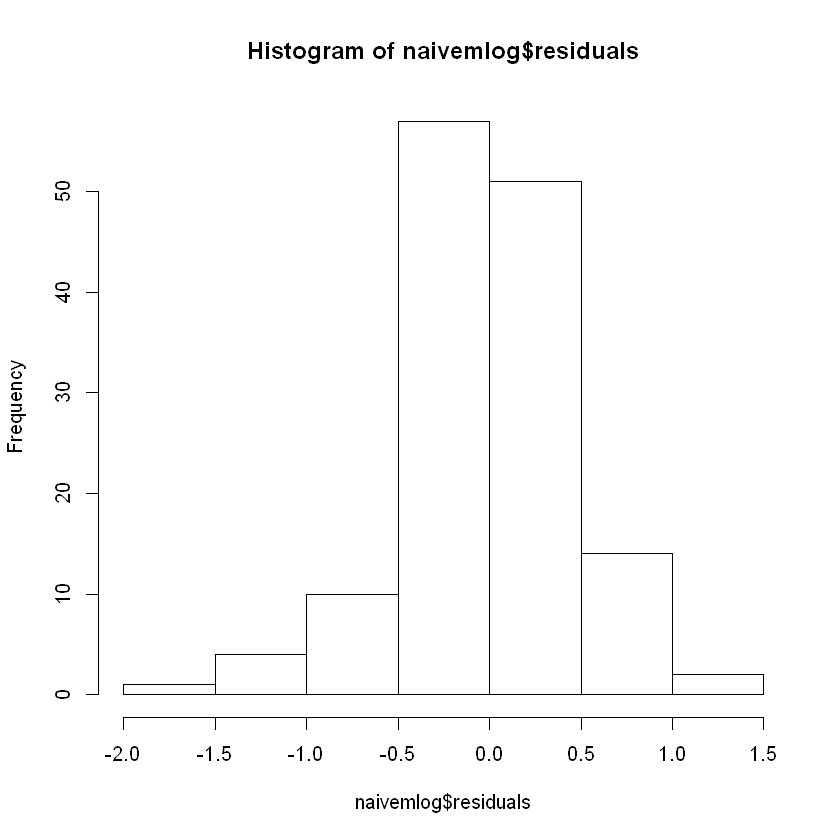

In [138]:
# histogram of residuals for the naive method - far from normal distribution
hist(naivemlog$residuals)

In [139]:
# testing normality of residuals with the Shapiro-Wilk test
# p < .05 => we reject the normality hypothesis
shapiro.test(naivemlog$residuals)


	Shapiro-Wilk normality test

data:  naivemlog$residuals
W = 0.961, p-value = 0.0005413


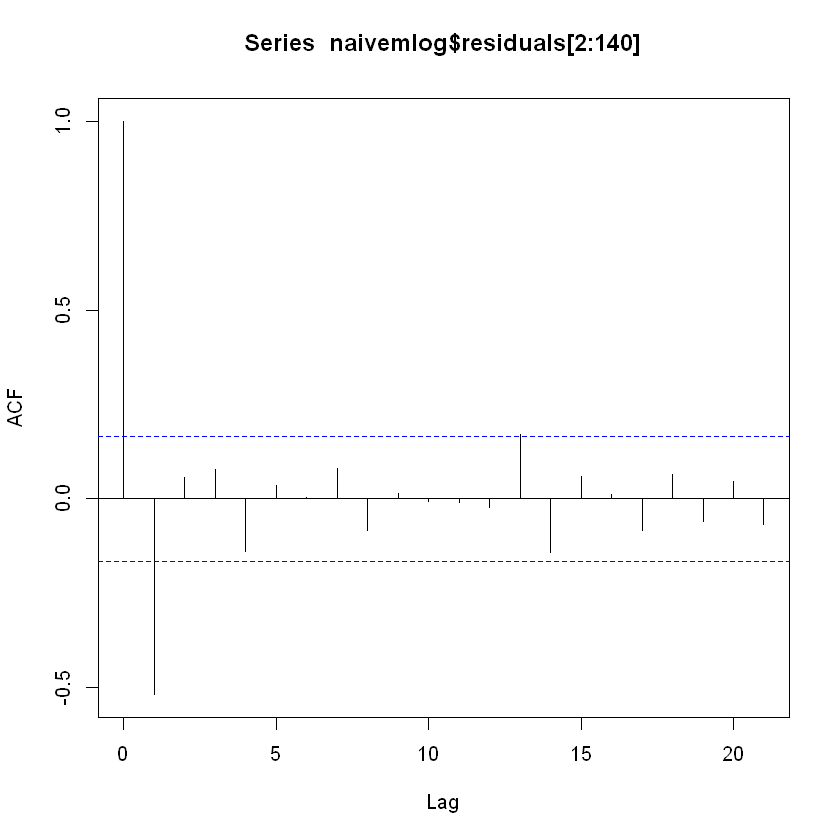

In [140]:
acf(naivemlog$residuals[2:140]) # one significant autocorrelation, one marginally significant

### CONCLUSION
### Due to smaller variations in variance of the dataset along the time, smaller variations of variance of residuals, mean of residuals closer to 0, their distribution somewhat closer to normal, and decreased number of significant autocorrelations, logaritmic transformation with naive method seems to be the best fit on this data.